In [1]:
#규제 

"""
학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것

L2규제
-각 가중치 제곱의 합에 규제강도 λ를 곱한다.
-λ를 크게 하면 가중치가 더 많이 감소되고, λ를 작게하면 가중치가 증가한다

L1규제
-가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제강도 λ를 곱하여 오차에 더한다.
-어떤 가중치는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것

! L2규제가 L1규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용됨

릿지(Ridge) - L2규제
라쏘(Lasso) - L1규제
"""

'\n학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것\n\nL2규제\n-각 가중치 제곱의 합에 규제강도 λ를 곱한다.\n-λ를 크게 하면 가중치가 더 많이 감소되고, λ를 작게하면 가중치가 증가한다\n\nL1규제\n-가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제강도 λ를 곱하여 오차에 더한다.\n-어떤 가중치는 실제로 0이 된다. 즉, 모델에서 완전히 제외되는 특성이 생기는 것\n\n! L2규제가 L1규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용됨\n\n릿지\n'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True) #수치형값 순정으로 나오

In [6]:
from sklearn.datasets import load_boston
data = load_boston()

df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['MEDV'] = data['target']
x_train, x_valid, y_train, y_valid = train_test_split(df.drop('MEDV',1), df['MEDV'])

#모델별 성능 확인을 위한 함수

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_valid})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [7]:
from sklearn.linear_model import Ridge

In [8]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

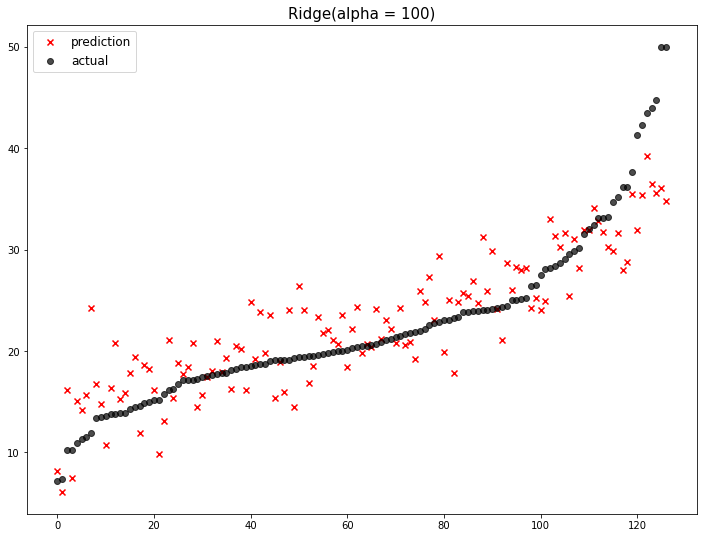

                   model        mse
0      Ridge(alpha = 10)  32.560163
1       Ridge(alpha = 1)  19.864939
2     Ridge(alpha = 100)  16.789335
3     Ridge(alpha = 0.1)  14.926519
4  Ridge(alpha = 0.0001)  14.865270
5   Ridge(alpha = 0.001)  14.848528
6    Ridge(alpha = 0.01)  14.711010


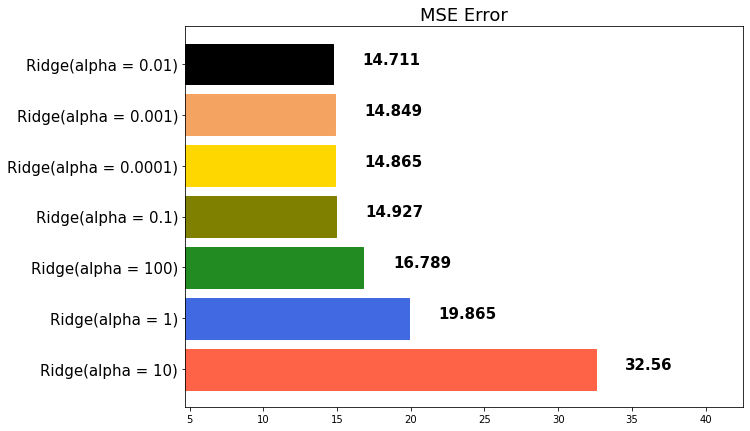

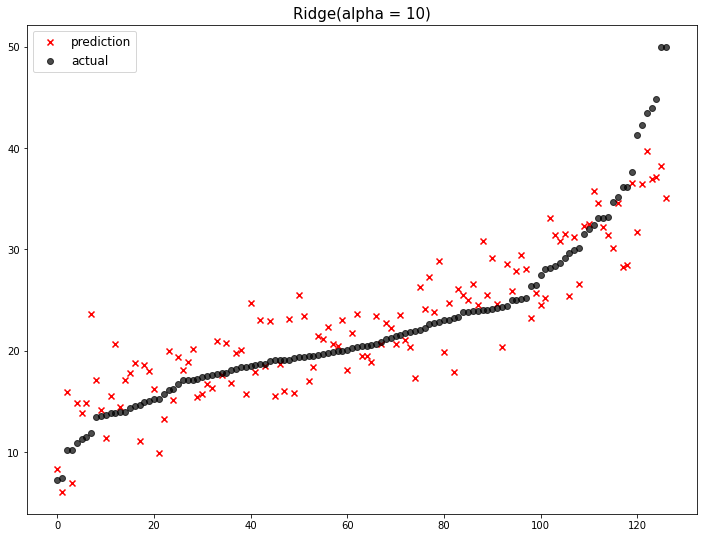

                   model        mse
0       Ridge(alpha = 1)  19.864939
1     Ridge(alpha = 100)  16.789335
2      Ridge(alpha = 10)  14.970852
3     Ridge(alpha = 0.1)  14.926519
4  Ridge(alpha = 0.0001)  14.865270
5   Ridge(alpha = 0.001)  14.848528
6    Ridge(alpha = 0.01)  14.711010


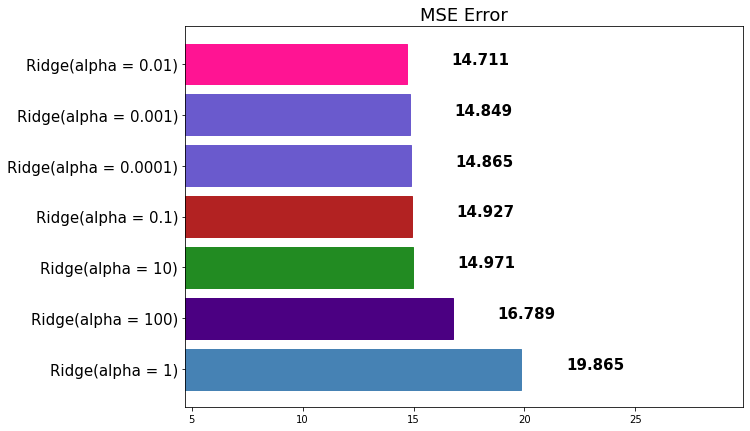

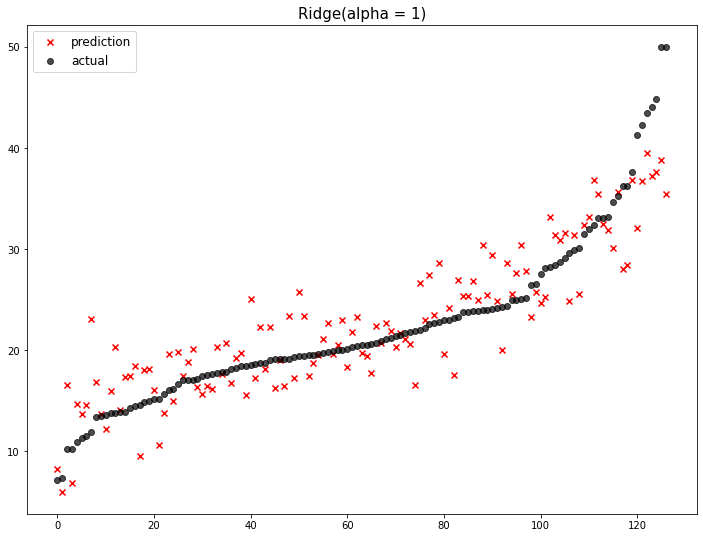

                   model        mse
0     Ridge(alpha = 100)  16.789335
1      Ridge(alpha = 10)  14.970852
2     Ridge(alpha = 0.1)  14.926519
3  Ridge(alpha = 0.0001)  14.865270
4   Ridge(alpha = 0.001)  14.848528
5    Ridge(alpha = 0.01)  14.711010
6       Ridge(alpha = 1)  14.670893


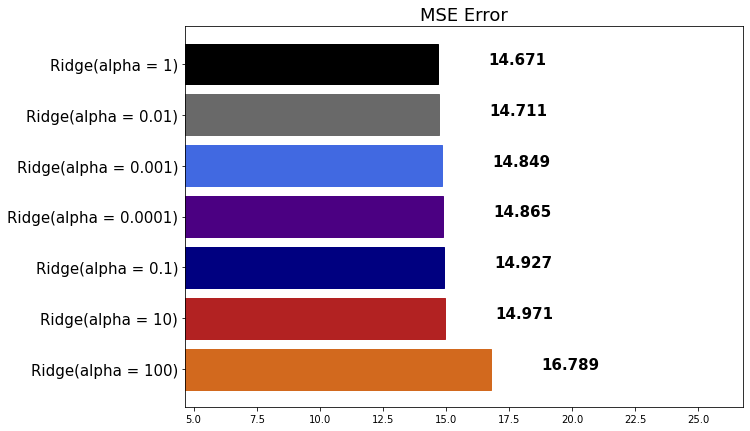

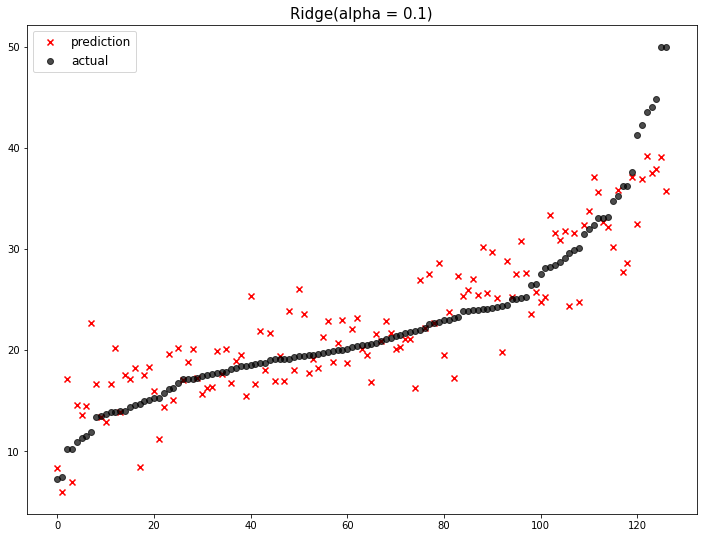

                   model        mse
0     Ridge(alpha = 100)  16.789335
1      Ridge(alpha = 10)  14.970852
2  Ridge(alpha = 0.0001)  14.865270
3   Ridge(alpha = 0.001)  14.848528
4     Ridge(alpha = 0.1)  14.801451
5    Ridge(alpha = 0.01)  14.711010
6       Ridge(alpha = 1)  14.670893


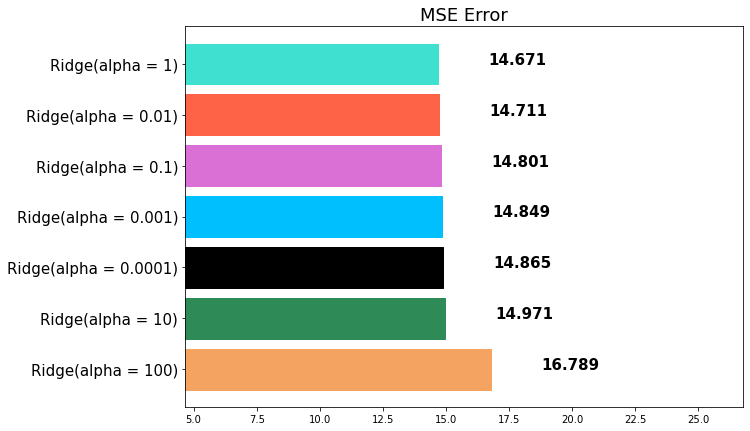

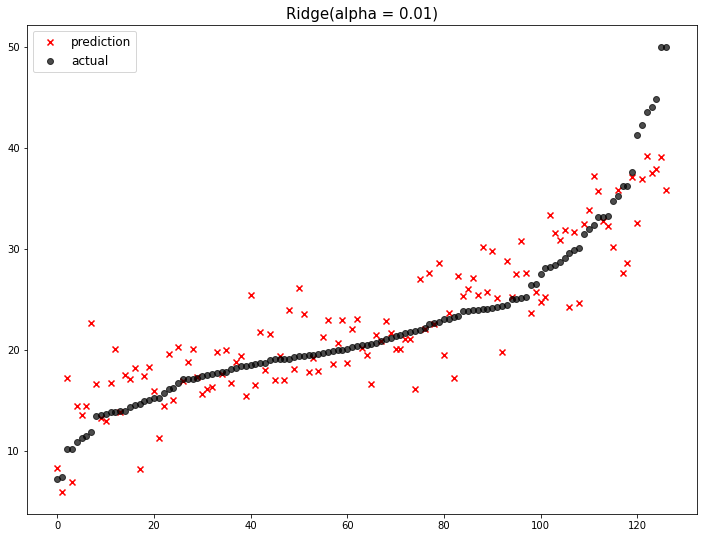

                   model        mse
0     Ridge(alpha = 100)  16.789335
1      Ridge(alpha = 10)  14.970852
2  Ridge(alpha = 0.0001)  14.865270
3    Ridge(alpha = 0.01)  14.859459
4   Ridge(alpha = 0.001)  14.848528
5     Ridge(alpha = 0.1)  14.801451
6       Ridge(alpha = 1)  14.670893


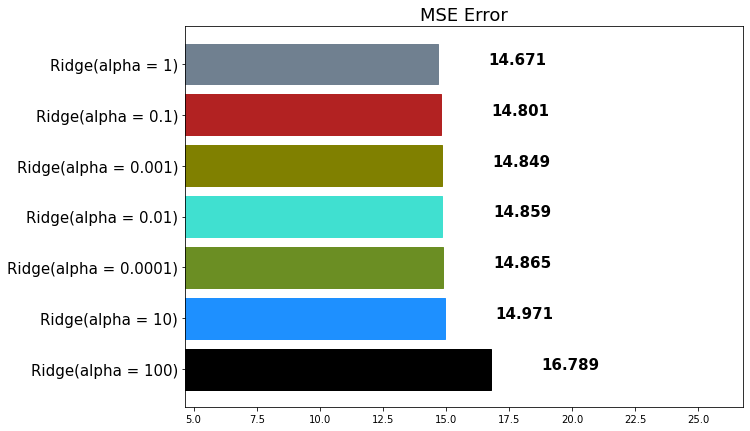

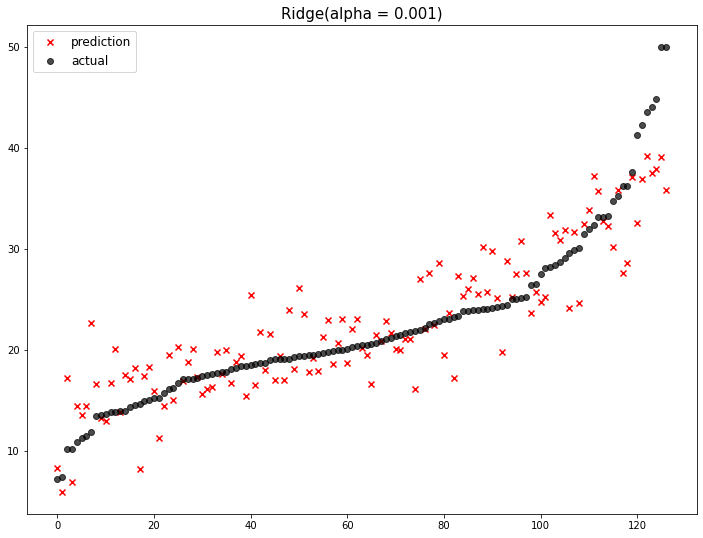

                   model        mse
0     Ridge(alpha = 100)  16.789335
1      Ridge(alpha = 10)  14.970852
2   Ridge(alpha = 0.001)  14.866381
3  Ridge(alpha = 0.0001)  14.865270
4    Ridge(alpha = 0.01)  14.859459
5     Ridge(alpha = 0.1)  14.801451
6       Ridge(alpha = 1)  14.670893


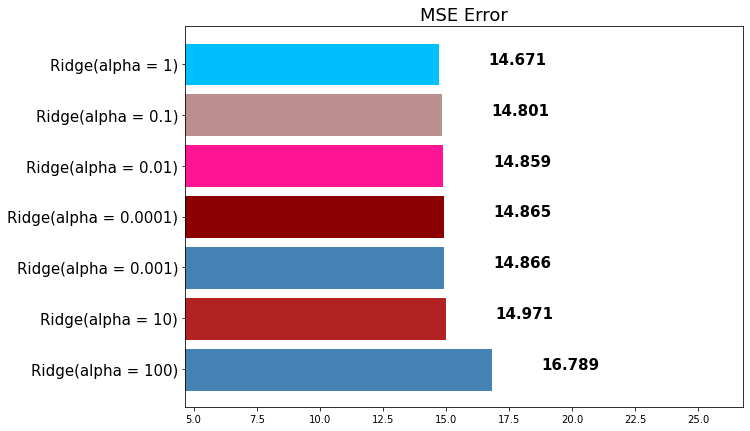

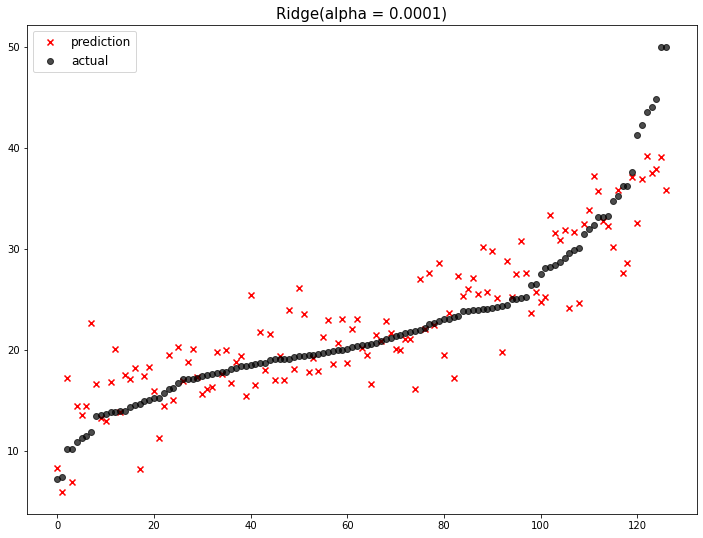

                   model        mse
0     Ridge(alpha = 100)  16.789335
1      Ridge(alpha = 10)  14.970852
2  Ridge(alpha = 0.0001)  14.867086
3   Ridge(alpha = 0.001)  14.866381
4    Ridge(alpha = 0.01)  14.859459
5     Ridge(alpha = 0.1)  14.801451
6       Ridge(alpha = 1)  14.670893


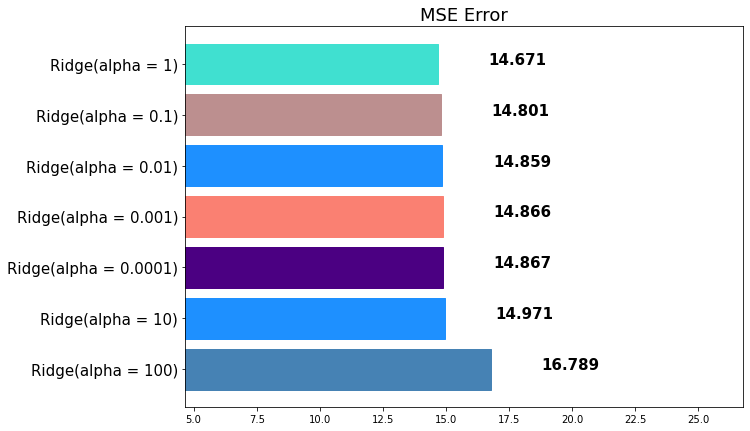

In [23]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_valid)
    mse_eval('Ridge(alpha = {})'.format(alpha),pred,y_valid)

In [13]:
#학습이 원료된 가중치 확인가능

ridge.coef_

array([ -0.11123741,   0.05247193,  -0.03039946,   3.36781912,
       -19.71549491,   3.31017363,  -0.00087681,  -1.70239846,
         0.3272902 ,  -0.01303093,  -0.91636313,   0.00775701,
        -0.5329908 ])

In [14]:
#시각화 함수

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

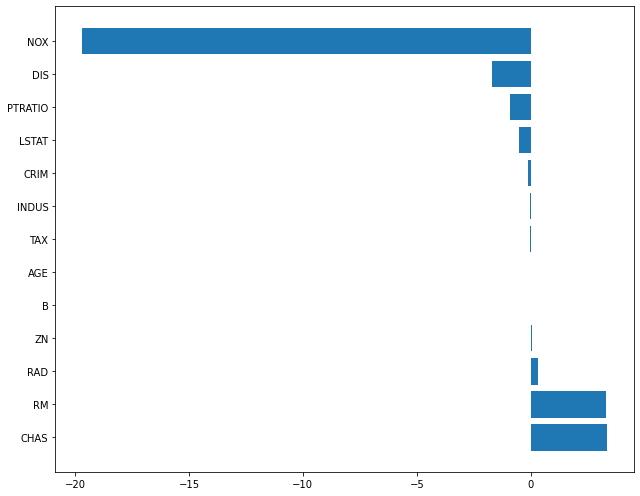

In [15]:
plot_coef(x_train.columns, ridge.coef_)

In [16]:
ridge_100 = Ridge(alpha = 100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_valid)

ridge_001 = Ridge(alpha = 0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_valid)

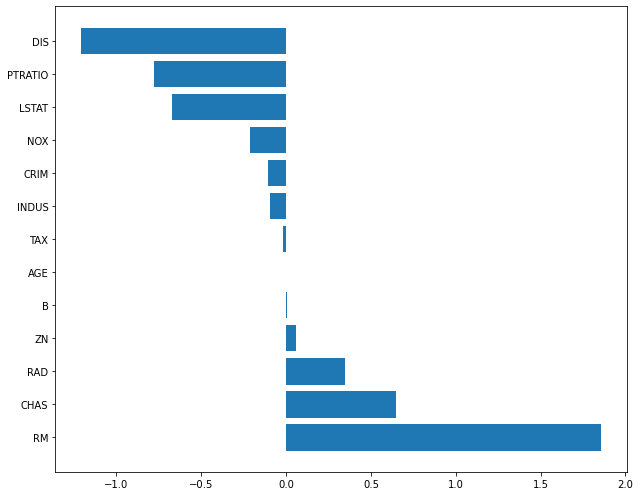

In [18]:
plot_coef(x_train.columns, ridge_100.coef_)

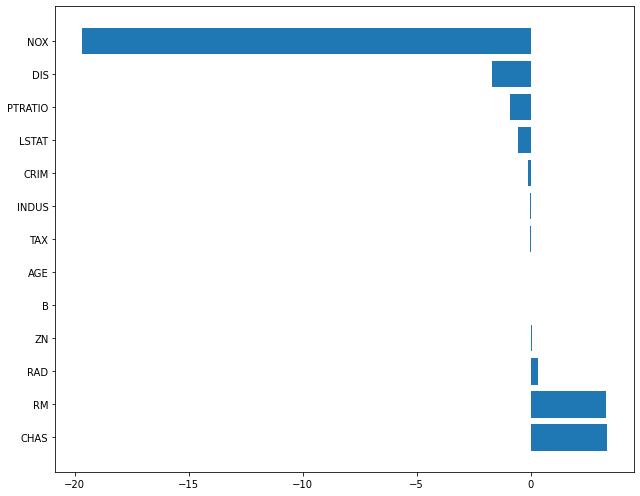

In [19]:
plot_coef(x_train.columns, ridge_001.coef_)

In [20]:
#라쏘모델 

from sklearn.linear_model import Lasso

In [21]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

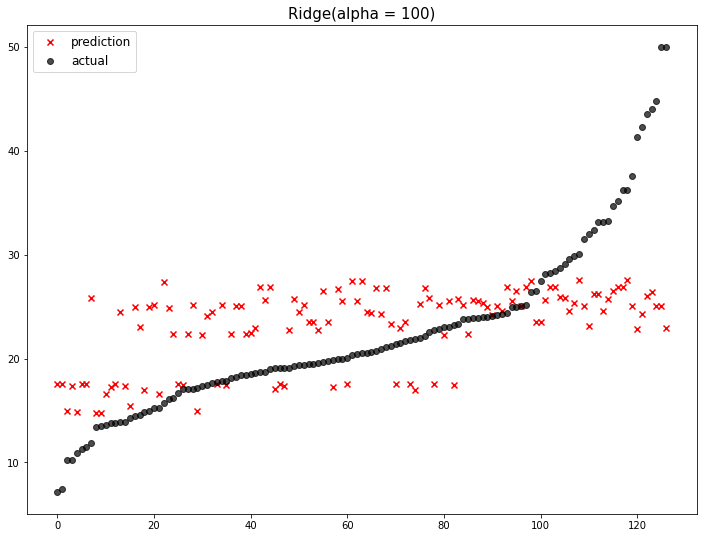

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  14.970852
2  Ridge(alpha = 0.0001)  14.867086
3   Ridge(alpha = 0.001)  14.866381
4    Ridge(alpha = 0.01)  14.859459
5     Ridge(alpha = 0.1)  14.801451
6       Ridge(alpha = 1)  14.670893


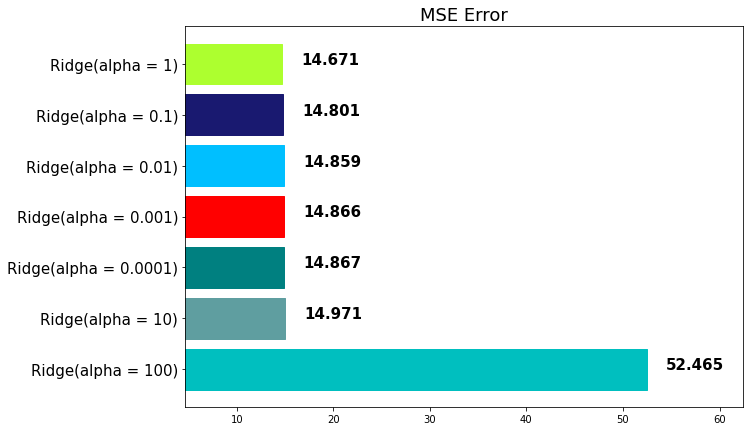

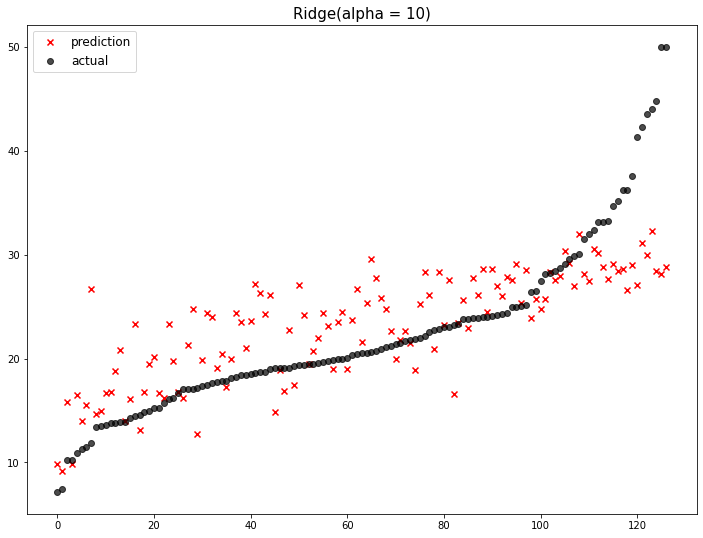

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  32.560163
2  Ridge(alpha = 0.0001)  14.867086
3   Ridge(alpha = 0.001)  14.866381
4    Ridge(alpha = 0.01)  14.859459
5     Ridge(alpha = 0.1)  14.801451
6       Ridge(alpha = 1)  14.670893


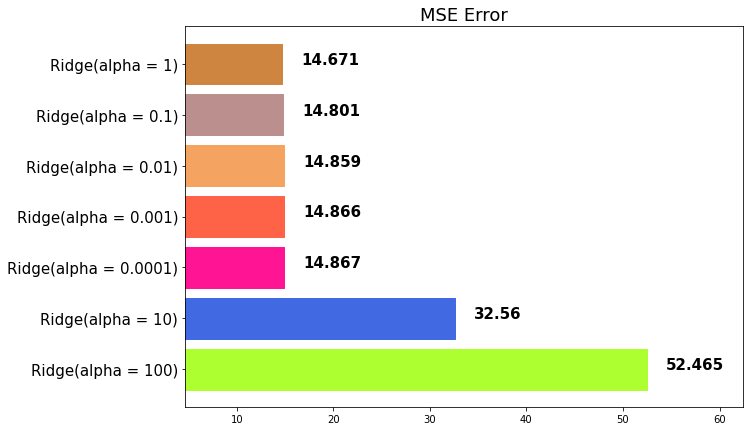

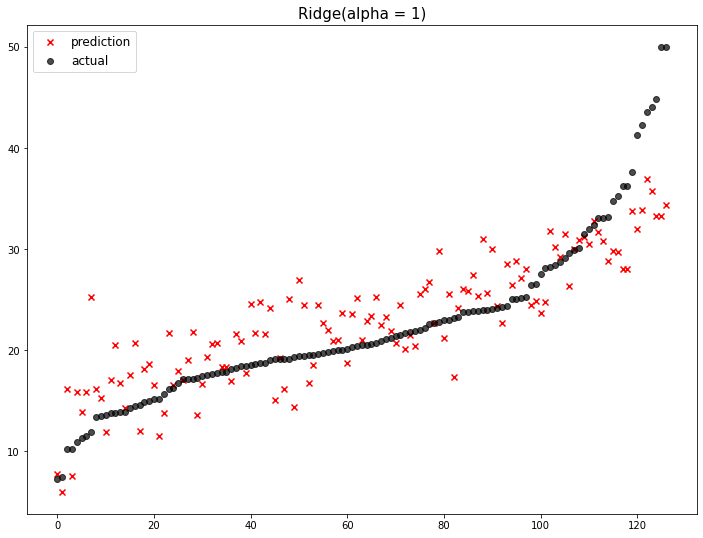

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  32.560163
2       Ridge(alpha = 1)  19.864939
3  Ridge(alpha = 0.0001)  14.867086
4   Ridge(alpha = 0.001)  14.866381
5    Ridge(alpha = 0.01)  14.859459
6     Ridge(alpha = 0.1)  14.801451


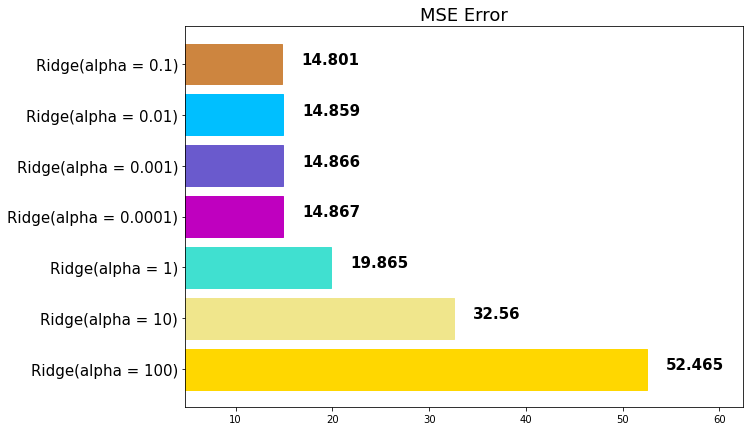

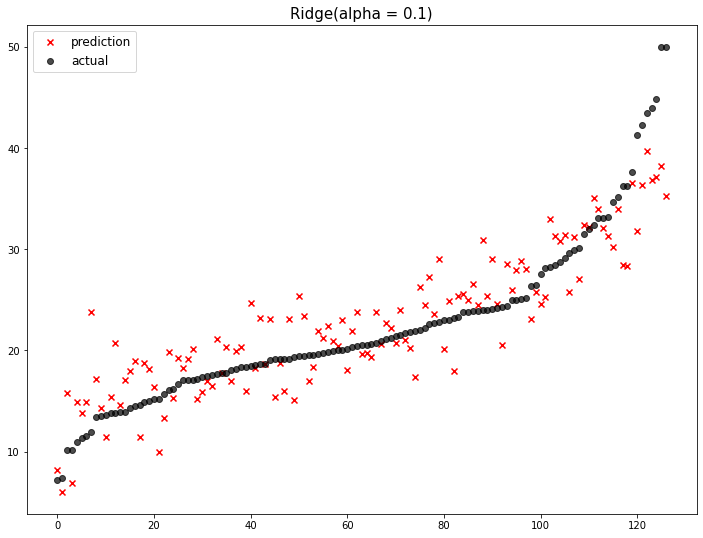

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  32.560163
2       Ridge(alpha = 1)  19.864939
3     Ridge(alpha = 0.1)  14.926519
4  Ridge(alpha = 0.0001)  14.867086
5   Ridge(alpha = 0.001)  14.866381
6    Ridge(alpha = 0.01)  14.859459


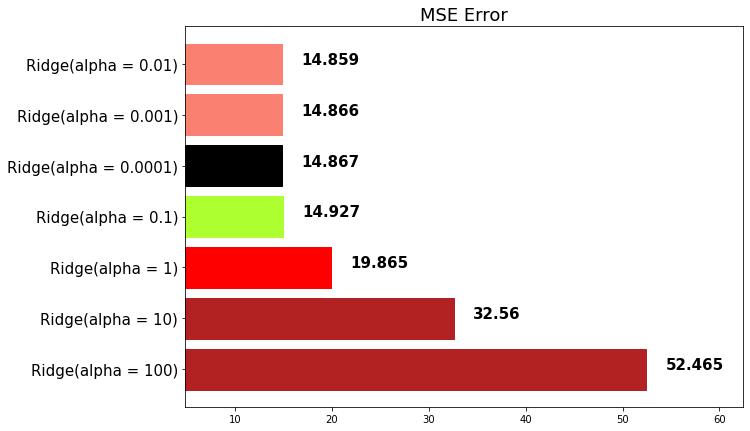

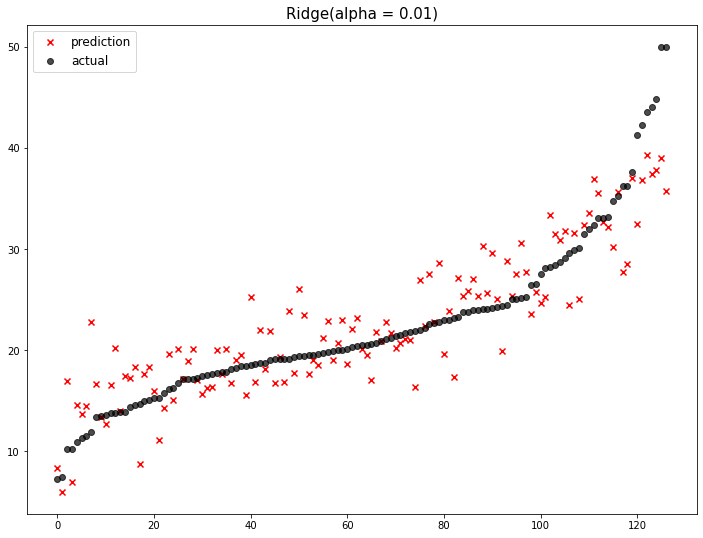

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  32.560163
2       Ridge(alpha = 1)  19.864939
3     Ridge(alpha = 0.1)  14.926519
4  Ridge(alpha = 0.0001)  14.867086
5   Ridge(alpha = 0.001)  14.866381
6    Ridge(alpha = 0.01)  14.711010


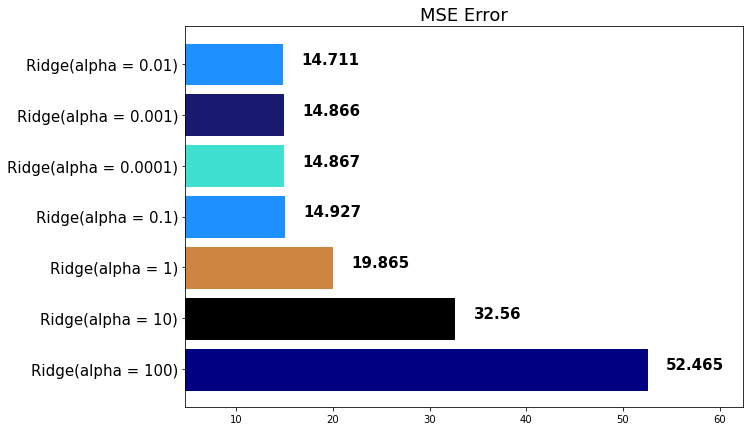

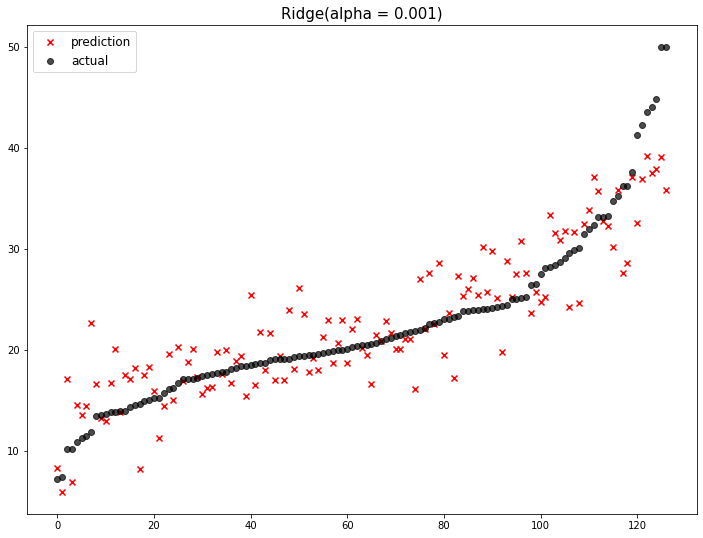

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  32.560163
2       Ridge(alpha = 1)  19.864939
3     Ridge(alpha = 0.1)  14.926519
4  Ridge(alpha = 0.0001)  14.867086
5   Ridge(alpha = 0.001)  14.848528
6    Ridge(alpha = 0.01)  14.711010


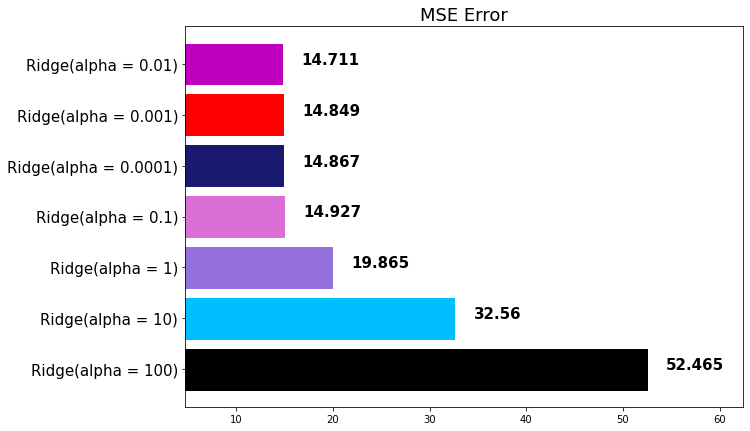

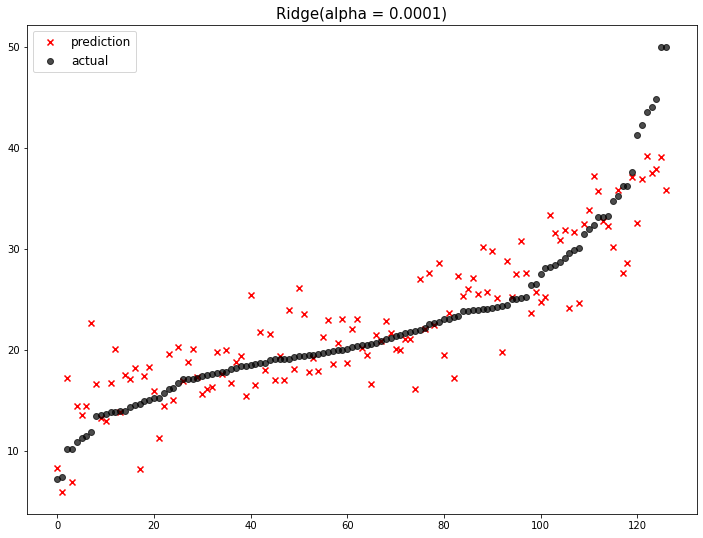

                   model        mse
0     Ridge(alpha = 100)  52.464595
1      Ridge(alpha = 10)  32.560163
2       Ridge(alpha = 1)  19.864939
3     Ridge(alpha = 0.1)  14.926519
4  Ridge(alpha = 0.0001)  14.865270
5   Ridge(alpha = 0.001)  14.848528
6    Ridge(alpha = 0.01)  14.711010


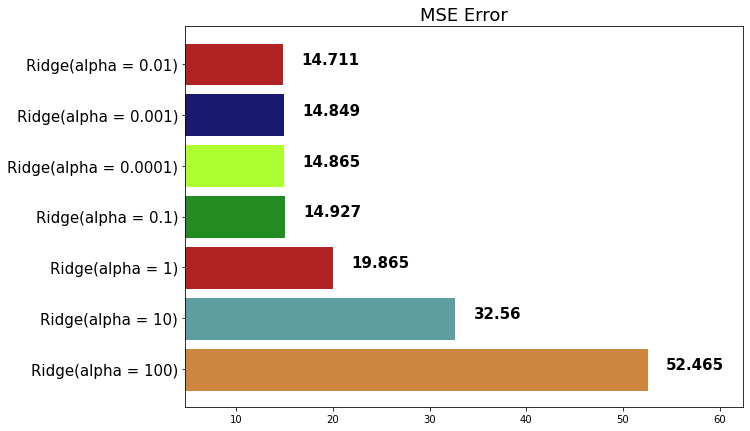

In [22]:
for alpha in alphas:
    ridge = Lasso(alpha = alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_valid)
    mse_eval('Ridge(alpha = {})'.format(alpha),pred,y_valid)

In [25]:
lasso_100 = Lasso(alpha = 100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_valid)

lasso_001 = Lasso(alpha = 0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_valid)

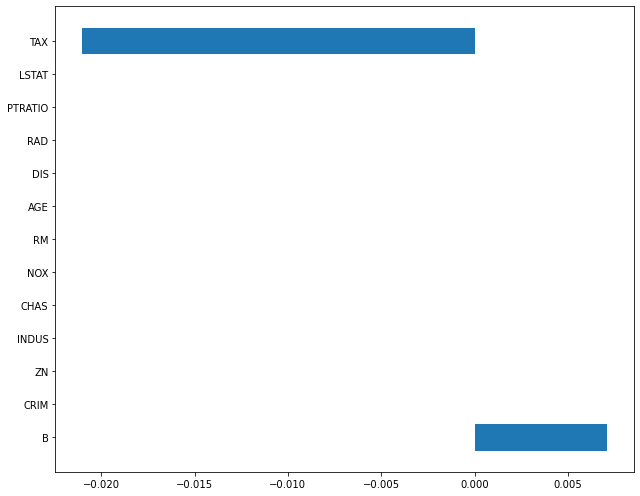

In [27]:
lasso_001

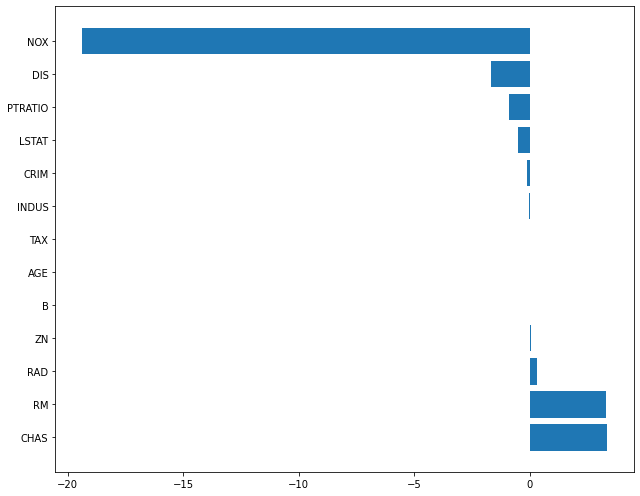

In [28]:
plot_coef(x_train.columns, lasso_001.coef_)

In [ ]:
#라쏘모델은 규제를 강하게 주면 가중치가 0이 될 확률이 있음

In [ ]:
##ELasticnet 엘라스틱넷
"""
l1_ratio(default = 0.5)
- l1_ratio = 0(L2 규제만 사용)
- l1_ratio = 1(L1 규제만 사용)
- 0 < l1_raito < 1 (L1 and L2 규제의 혼합사용)
"""

In [29]:
from sklearn.linear_model import ElasticNet

In [32]:
ratios = [0.2, 0.5, 0.8]

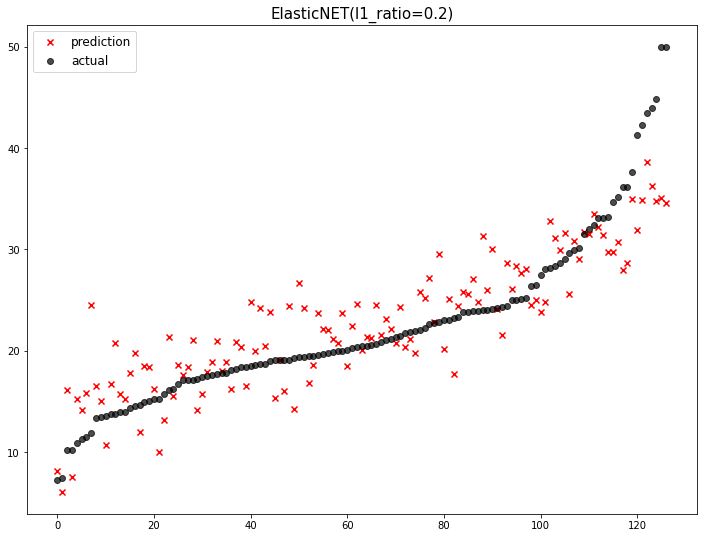

                      model        mse
0  ElasticNET(l1_ratio=0.2)  17.737111
1        Ridge(alpha = 100)  16.789335
2         Ridge(alpha = 10)  14.970852
3     Ridge(alpha = 0.0001)  14.867086
4      Ridge(alpha = 0.001)  14.866381
5       Ridge(alpha = 0.01)  14.859459
6        Ridge(alpha = 0.1)  14.801451
7          Ridge(alpha = 1)  14.670893


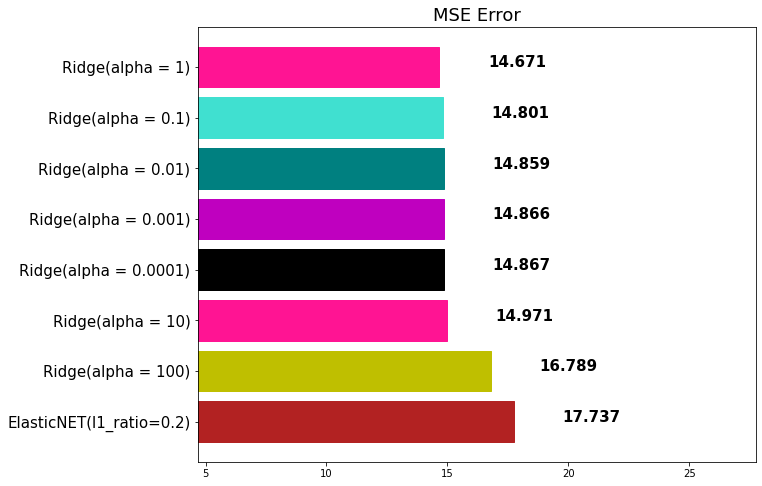

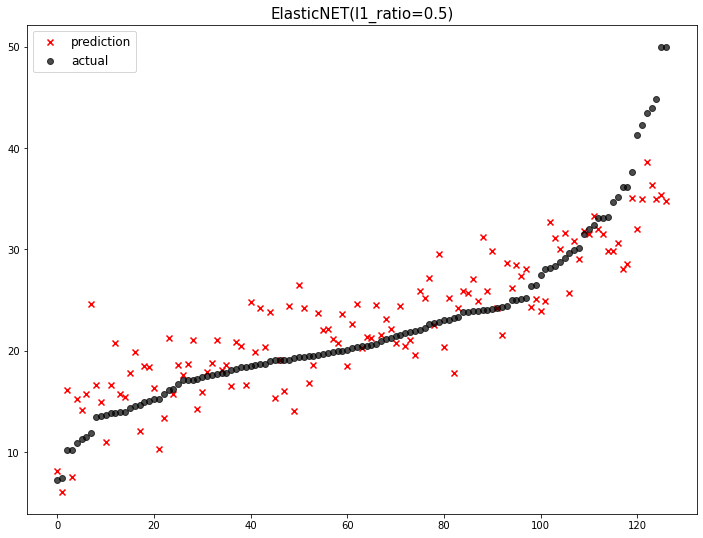

                      model        mse
0  ElasticNET(l1_ratio=0.2)  17.737111
1  ElasticNET(l1_ratio=0.5)  17.466482
2        Ridge(alpha = 100)  16.789335
3         Ridge(alpha = 10)  14.970852
4     Ridge(alpha = 0.0001)  14.867086
5      Ridge(alpha = 0.001)  14.866381
6       Ridge(alpha = 0.01)  14.859459
7        Ridge(alpha = 0.1)  14.801451
8          Ridge(alpha = 1)  14.670893


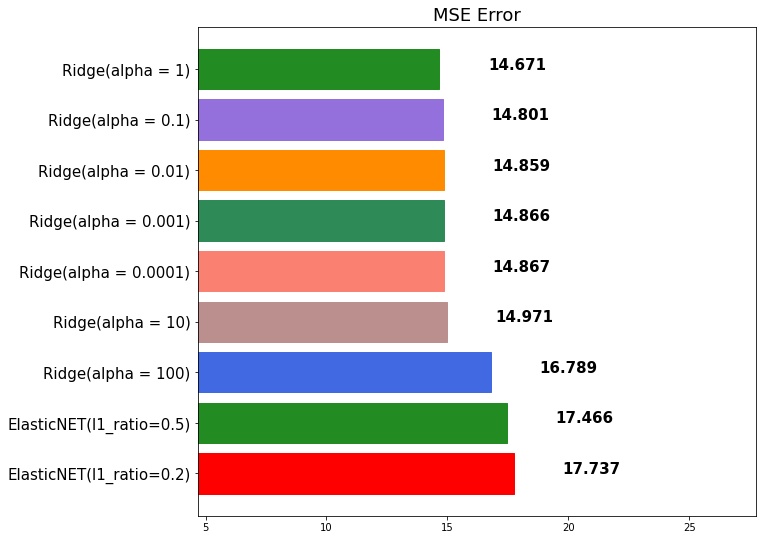

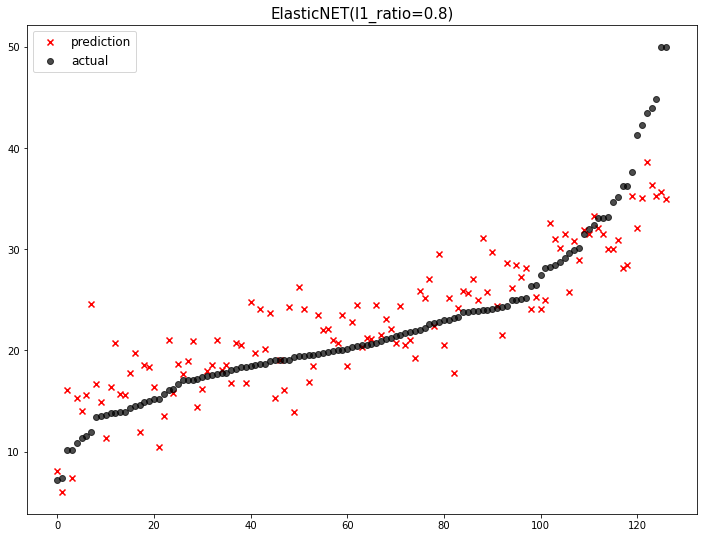

                      model        mse
0  ElasticNET(l1_ratio=0.2)  17.737111
1  ElasticNET(l1_ratio=0.5)  17.466482
2  ElasticNET(l1_ratio=0.8)  17.010232
3        Ridge(alpha = 100)  16.789335
4         Ridge(alpha = 10)  14.970852
5     Ridge(alpha = 0.0001)  14.867086
6      Ridge(alpha = 0.001)  14.866381
7       Ridge(alpha = 0.01)  14.859459
8        Ridge(alpha = 0.1)  14.801451
9          Ridge(alpha = 1)  14.670893


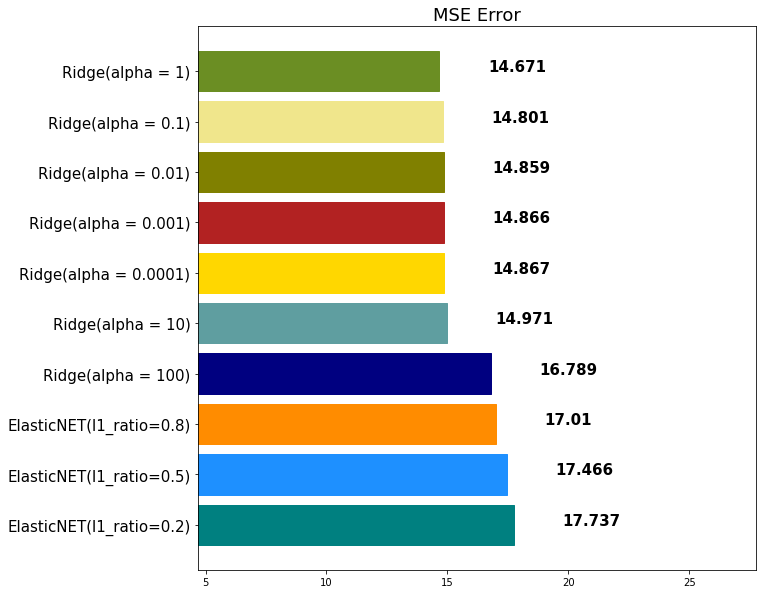

In [33]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha = 0.5, l1_ratio = ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_valid)
    mse_eval('ElasticNET(l1_ratio={})'.format(ratio), pred,y_valid)